In [32]:
from ipynb.fs.full.simulate_snn import apply_ltspice_neuron 
from ipynb.fs.full.simulate_snn import apply_ltspice_synapse
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import math
import imageio

In [33]:
sample_width=20e-3    # our samples shall be 10 ms wide
delta_t=1e-6          # time step between samples: 1 us
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)
ref_vol_1 = 0+ 1.8 * (time < 51e-3)
ref_vol_2 = 0+ 1.9 * (time < 51e-3)

In [34]:
 #Ref Neuron for intensity comaparision
def neuron_n3(ref_vol_1):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    _, spikes_n3 = apply_ltspice_neuron("newneuron.asc", time, ref_vol_1, params=config_neuron)
    p3,_ =find_peaks(spikes_n3,height=1.5)
    n3=len(p3)
    return n3,spikes_n3

In [35]:
 #Ref Neuron for gradient comaparision
def neuron_n2():
    config_2 = {"C":1e-9, "R":0.5e6  }
    ref_vol_2 = 2.0+ (4/255)*(time < 21e-3)
    _, spikes_n2 = apply_ltspice_neuron("newneuron.asc", time, ref_vol_2, params=config_2)
    p2,_ =find_peaks(spikes_n2,height=1.5)
    n2=len(p2)
    return n2,spikes_n2

In [36]:
#Sensory neuron 
def neuron_n1(volt):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    v= 0+ (volt * (time < 21e-3))
    _, spikes_n1 = apply_ltspice_neuron("newneuron.asc", time, v , params=config_neuron)
    p1,_ =find_peaks(spikes_n1,height=1.5)
    n1=len(p1)
    return n1,spikes_n1

In [37]:
#At-Tiny A1
def attiny_a1(i,volt):
    config_2 = {"C":1e-9, "R":0.5e6  }
    if (i<1):
        ref_vol_2 = 2.0+ (4/255)*(time < 21e-3)
        _,spikes_a1 = apply_ltspice_neuron( "newneuron.asc",time, ref_vol_2,params=config_2) 
        at_v[i] =volt
        run=0
        
    else:
        volt_diff = 2.0+ (0.75*(at_v[1]-at_v[0]))* (time < 21e-3)
        _,spikes_a1 = apply_ltspice_neuron( "newneuron.asc",time, volt_diff,params=config_2 ) 
        at_v[0] =at_v[1]
        at_v[1] = volt
        run=0
       
    s1, _ =find_peaks(spikes_a1,height=1.5) 
    a1 = len(s1)
    return a1,spikes_a1,run

In [38]:
#ASEL
def neuron_n4(spikes_a1, spikes_n2):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse = {"R1" :50e3, "R2" :100e3 }
    _, spikes_n4 = apply_ltspice_synapse("synapse_v6",time, spikes_a1,spikes_n2 )
    p4,_ =find_peaks(spikes_n4,height=1.5)
    n4=len(p4)
    return n4,spikes_n4

In [39]:
#ASER
def neuron_n5(spikes_n2 , spikes_a1):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse = {"R1" :50e3, "R2" :100e3 }
    _, spikes_n5 = apply_ltspice_synapse("synapse_v6",time, spikes_n2,spikes_a1 )
    p5,_ =find_peaks(spikes_n5,height=1.5)
    n5=len(p5)
    return n5,spikes_n5

In [40]:
#C < C_t
def neuron_n6(spikes_n3, spikes_n1):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse = {"R1" :50e3, "R2" :100e3 }
    _, spikes_n6 = apply_ltspice_synapse("synapse_v6",time, spikes_n3,spikes_n1 )
    p6,_ =find_peaks(spikes_n6,height=1.5)
    n6=len(p6)
    return n6,spikes_n6

In [41]:
#C > C_t
def neuron_n7(spikes_n1 , spikes_n3):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse = {"R1" :50e3, "R2" :100e3 }
    _, spikes_n7 = apply_ltspice_synapse("synapse_v6",time, spikes_n1,spikes_n3 )
    p7,_ =find_peaks(spikes_n7,height=1.5)
    n7=len(p7)
    return n7,spikes_n7

In [42]:
# Neuron 8 : Turn ACW
def neuron_n8(spikes_n6, spikes_n5):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse1 =  {"R" : 2e6,"C" : 0.5e-9}
    _, spikes_n8 = apply_ltspice_synapse("2expsynapse1.asc",time, spikes_n6,spikes_n5, params=config_synapse1)
    p8,_ =find_peaks(spikes_n8,height=1.5)
    n8=len(p8)
    return n8,spikes_n8

In [43]:
# Neuron 10 : Turn CW
def neuron_n10(spikes_n4, spikes_n7):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    config_synapse1 =  {"R" : 2e6,"C" : 0.5e-9}
    _, spikes_n10 = apply_ltspice_synapse("2expsynapse1.asc",time, spikes_n4,spikes_n7, params=config_synapse1)
    p10,_ =find_peaks(spikes_n10,height=1.5)
    n10=len(p10)
    return n10,spikes_n10

In [44]:
#Neuron 11
def neuron_n11(spikes_n8):
    config_neuron = {"C":10e-12, "R":0.5e6  }
    v11 = 0+ 1.8 * (time < 51e-3)
    _, spikes_n11 = apply_ltspice_neuron("newneuron.asc", time, spikes_n8 , params=config_neuron)
    p11,_ =find_peaks(spikes_n11,height=1.5)
    n11=len(p11)
    return n11,spikes_n11

In [45]:
#Neuron 12
def neuron_n12(spikes_n10):
    config_neuron = {"C":10e-12, "R":0.5e6  }
    v11 = 0+ 1.8 * (time < 51e-3)
    _, spikes_n12 = apply_ltspice_neuron("newneuron.asc", time, spikes_n10, params=config_neuron)
    p12,_ =find_peaks(spikes_n12,height=1.5)
    n12=len(p12)
    return n12,spikes_n12

In [46]:
#At-Tiny A2
def attiny_a2(a,b,n11,n12):
    if n11:
        a=a+1
    if n12:
        b=b+1
    c=a-b    
    
    if c==5:
        v13=2
        a=0
        b=0
    elif c==-5:
        v13=2
        a=0
        b=0
    else :
        v13=0
        
    return a,b,v13    

In [47]:
#motor neuron to escape extrema
def neuron_n13(v13):
    config_neuron = {"C":4e-9, "R":0.5e6  }
    fv = 0+ v13 * (time < 21e-3)
    _, spikes_n13 = apply_ltspice_neuron("newneuron.asc", time,fv, params=config_neuron)
    p13,_ =find_peaks(spikes_n13,height=1.5)
    n13=len(p13)
    return n13

In [48]:
run = 0

dt = 0.001 # simulation time step (msec)
theta = -math.radians(90)
Cseen = np.zeros(len(time))
images = [] # Frames of the GIF
snap = 10 * int(1/dt) # Sampling distance between images for the GIF 
n8=0
n10=0
at_v = np.zeros(3)

Text(0.5, 0, 'X Coordinate (mm)')

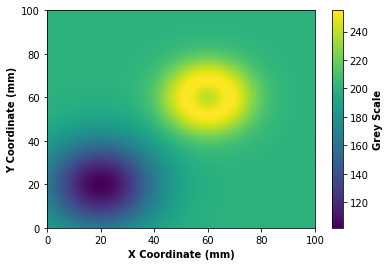

In [49]:
# Defines the concentration space, returns the concentration value at the input coordinate
def f(x, y):
    return 200 + 98*(np.exp(-(x/15.0 - 4)**2 - (y/15.0 - 4)**2) - 0.6 * np.exp(-(x/7.5 - 8)**2 - (y/7.5 - 8)**2) - np.exp(-(x/20.0 - 1)**2 - (y/20.0 - 1)**2))

# Render the concentration space
n = 256
x = np.linspace(0, 100, n)
y = np.linspace(0, 100, n)
X, Y = np.meshgrid(x, y)
m=[[f(i,j) for j in range(100)] for i in range(100)]
z = np.array(m)
cb = plt.pcolor(X, Y, f(X, Y))
cbar = plt.colorbar()
cbar.ax.set_ylabel('Grey Scale', fontweight='bold')
plt.ylabel('Y Coordinate (mm)',  fontweight='bold')
plt.xlabel('X Coordinate (mm)',  fontweight='bold')

In [50]:
np.min(z)

102.0000652519424

Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
0
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
1
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
2
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
3
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
4
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal acc

Normal access
Normal access
47
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
48
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
Normal access
49


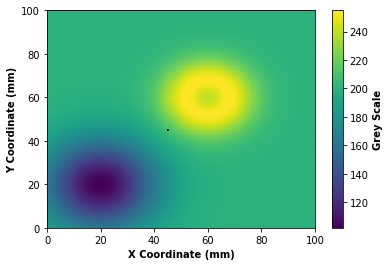

In [51]:
# Defines the concentration space, returns the concentration value at the input coordinate
def f(x, y):
    return 200 + 98*(np.exp(-(x/15.0 - 4)**2 - (y/15.0 - 4)**2) - 0.6 * np.exp(-(x/7.5 - 8)**2 - (y/7.5 - 8)**2) - np.exp(-(x/20.0 - 1)**2 - (y/20.0 - 1)**2))

# Render the concentration space
n = 256
x = np.linspace(0, 100, n)
y = np.linspace(0, 100, n)
X, Y = np.meshgrid(x, y)
m=[[f(i,j) for j in range(100)] for i in range(100)]
z = np.array(m)
cb = plt.pcolor(X, Y, f(X, Y))
cbar = plt.colorbar()
cbar.ax.set_ylabel('Grey Scale', fontweight='bold')
plt.ylabel('Y Coordinate (mm)',  fontweight='bold')
plt.xlabel('X Coordinate (mm)',  fontweight='bold')
x = 45#initial x-coordinate
y = 45#initial y-coordinate
# Simulate neuron behavior
m=n=o=p=0
a=b=0
ct=130
vol_1=vol_2=1.5+(ct/255)
ref_vol_1 = 0+ vol_1*(time < 21e-3)
ref_vol_2 = 0+ vol_2*(time < 21e-3)
n3,spikes_n3 = neuron_n3(ref_vol_1)
n2,spikes_n2 = neuron_n2()
t=np.zeros(len(time))
for i in range(50):
    
    if(run > 0):
        run = run -1
        m=m+1
        v = 20
        if (x==100):
            run=10
            theta=math.radians(-90)
        elif (x==0):
            run=10
            theta= math.radians(90)
        
        if (y==100):
            run=10
            theta=math.radians(-180)
        elif(y==0):
            run=10
            theta=math.radians(0) 
            
        continue    
    if n8:
        v = 5*n8
        theta = theta - math.radians(45)
        n=n+1
    elif n10:
        v = 5*n10
        theta = theta +  math.radians(45)
        o=o+1
    else:
        v = 5 
        theta = theta + (np.random.uniform(-3,3)) * math.radians(45)
        p=p+1

    # Move with updated direction and velocity
    dx = v * dt * np.cos(theta)
    dy = v * dt * np.sin(theta)
    
    
    
    plt.plot([x, x + dx], [y, y + dy], color='black', linewidth=0.6)
         
    x = min(max(x+dx, 0), 100)
    y = min(max(y+dy, 0), 100)
    if (x==100):
        v13=10
        theta=math.radians(-90)
    elif (x==0):
        v13=10
        theta= math.radians(90)
        
    if (y==100):
        v13=10
        theta=math.radians(-180)
    elif(y==0):
        v13=10
        theta=math.radians(0)
            
        
    
    t[i]=theta
    C = f(x, y)
    Cseen[i] = C
    volt=1.5+(C/255)
    if(i % 10 == 0):
        plt.savefig('conc.png')
        img = imageio.imread('conc.png')
        images.append(img)
    
    
    
    #detect gradient
    a1,spikes_a1,v13=attiny_a1(i,volt)
    run=neuron_n13(v13)
    if run:
        continue
    #detect intensity
    n1,spikes_n1 = neuron_n1(volt)
    #check c<ct
    n6,spikes_n6 = neuron_n6(spikes_n3, spikes_n1)
    #check c>ct
    n7,spikes_n7 = neuron_n7(spikes_n1 , spikes_n3)
    #check asel
    n4,spikes_n4 = neuron_n4(spikes_a1, spikes_n2)
    #check aser
    n5,spikes_n5 = neuron_n5(spikes_n2 , spikes_a1)
    #synapse between n6 and n5 => n8 => ACW
    n8, spikes_n8 = neuron_n8(spikes_n6, spikes_n5)
    #synapse between n7 and n4 => n10 => CW
    n10, spikes_n10 = neuron_n10(spikes_n4, spikes_n7)
#     #neuron n9 => Random walk
#     _, synapse_s5 = apply_ltspice_synapse("onesynapse.asc",time, spikes_n6, spikes_n4, params=config_synapse)
#     _, synapse_s6 = apply_ltspice_synapse("onesynapse.asc",time, spikes_n7, spikes_n5, params=config_synapse)
#     _, spikes_n9 = apply_ltspice_synapse("2expsynapse.asc",time, synapse_s6, synapse_s5, params=config_synapse1)
    
    #detect acw
    n11,spikes_n11 = neuron_n11(spikes_n8)
    #detect cw
    n12,spikes_n12 = neuron_n12(spikes_n10)
    
    #detect xor
    a,b,v13 = attiny_a2(a,b,n11,n12)
    
    #motor neuron to escape extrema
    run=neuron_n13(v13)
    print(i)
#     if i==1:
#         break


In [52]:
m

0

In [53]:
n

0

In [54]:
o

8

In [55]:
p

42

In [56]:
n8

0

In [57]:
n10

0